<a href="https://colab.research.google.com/github/Saradabre/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing** **Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots
%matplotlib inline
from sklearn.preprocessing import StandardScaler ,  LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score , precision_score , f1_score , confusion_matrix , classification_report

# for classification task
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier  , AdaBoostClassifier

import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Dense, Dropout
from tensorflow import keras

# **Load Dataset**

In [3]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Testing Loaded Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Data Preprocessing**

In [5]:
df.drop('customerID',axis=1,inplace=True)

In [6]:
df['TotalCharges'] = df['TotalCharges'].str.strip()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [8]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [9]:
df.shape

(7043, 20)

We have 7043 Features and 20 Columns in the Loaded Dataset

# **Data Visualization**

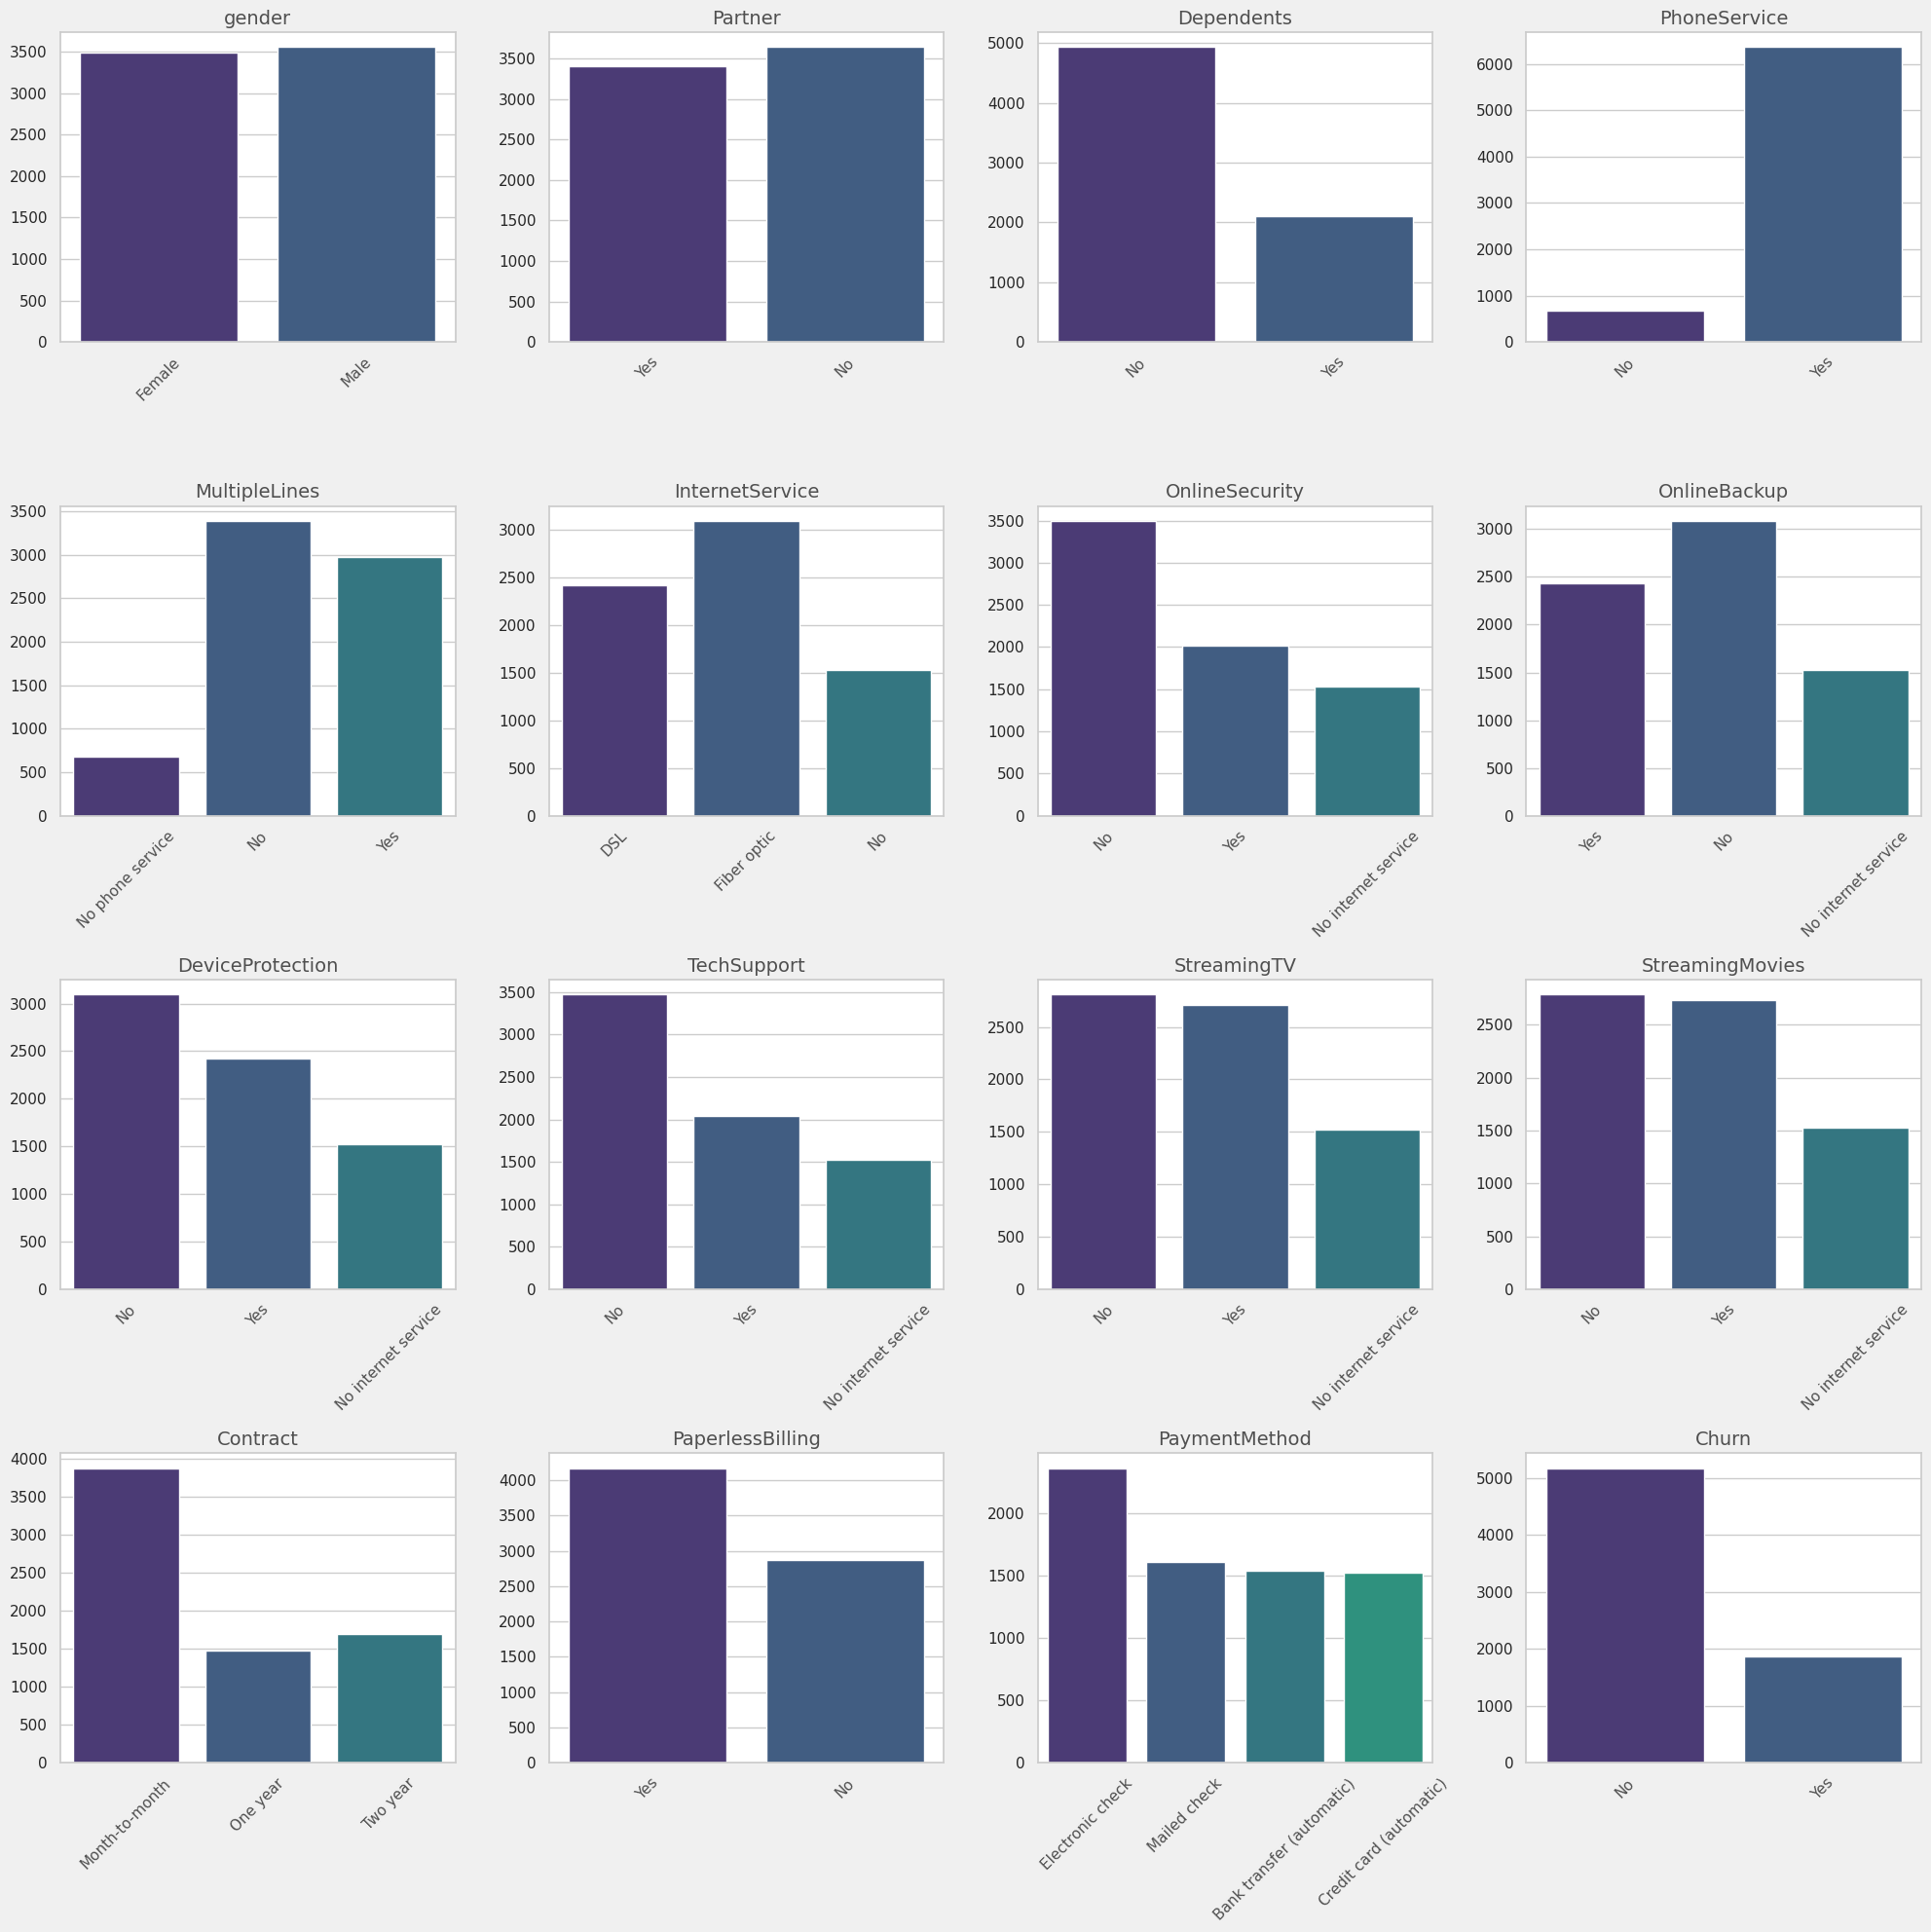

In [10]:
# List of categorical columns
categorical_columns = df.columns[df.dtypes == 'object'].tolist()

# Set a beautiful seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), facecolor='#f0f0f0')

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a color palette
palette = sns.color_palette("viridis", as_cmap=False)

# Iterate over categorical columns and plot each one
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i], palette=palette)
    axes[i].set_title(col, fontsize=14, color='#4f4f4f')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)
        label.set_color('#4f4f4f')

# Hide any unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

**Observation**: The visualisations show the distribution of various categorical variables in the Telco Customer Churn dataset. Most customers have no dependents, no online security, and no tech support, and a large portion use month-to-month contracts and electronic checks as the payment method. Internet service is mostly DSL or fiber optic, with fiber users generally showing lower counts in several service-related categories. The churn plot shows that the majority of customers do not churn, though a significant minority does leave. Overall, the charts help highlight imbalances in service adoption and contract types, which may influence churn behavior.

In [11]:
# Create subplots with 1 row and 3 columns
fig = make_subplots(rows=1, cols=3, subplot_titles=('Tenure', 'Monthly Charges', 'Total Charges'))

# Add histograms for each numerical column
fig.add_trace(go.Histogram(x=df['tenure'], name='Tenure'), row=1, col=1)
fig.add_trace(go.Histogram(x=df['MonthlyCharges'], name='Monthly Charges'), row=1, col=2)
fig.add_trace(go.Histogram(x=df['TotalCharges'], name='Total Charges'), row=1, col=3)

# Update layout
fig.update_layout(title_text='Distribution of Tenure, Monthly Charges, and Total Charges',
                  height=400, width=1000)

# Show the plot
fig.show()

**Observation: Distribution of Tenure, Monthly Charges, and Total Charges**
The tenure distribution shows many new customers with short service durations, while long-term customers are fewer. Monthly charges vary widely, with a large cluster around mid-range values. Total charges are heavily right-skewed, meaning most customers have low to moderate total spending, with only a few having very high total charges. This indicates a mix of new and long-standing customers with different spending patterns, which may influence churn.

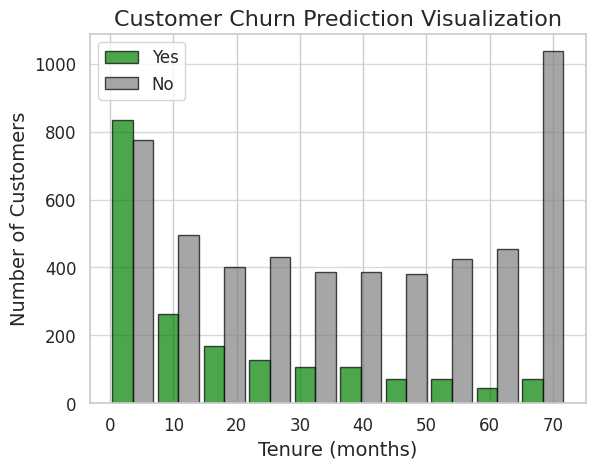

In [12]:
# Data preparation
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

# Plotting
# plt.figure(figsize=(10, 6))
plt.hist([tenure_churn_yes, tenure_churn_no], bins=10, rwidth=0.9, color=['green', 'grey'], edgecolor='black', alpha=0.7, label=['Yes', 'No'])

plt.xlabel("Tenure (months)", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.title("Customer Churn Prediction Visualization", fontsize=16)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

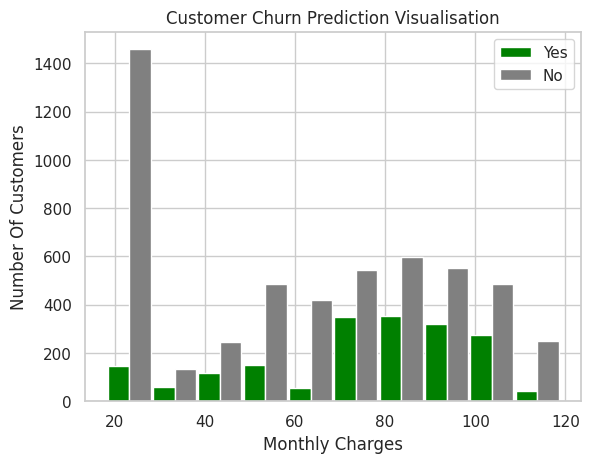

In [14]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualisation")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','grey'],label=['Yes','No'])
plt.legend()

In [15]:
# Create the scatter plot
fig = px.scatter(
    df,
    x='MonthlyCharges',
    color='gender',  # Differentiate points by color based on Gender
    symbol='Churn',  # Differentiate points by symbol based on Churn
    title='Relationship between Monthly Charges, Churn, and Gender',
    labels={'MonthlyCharges': 'Monthly Charges', 'Churn': 'Churn', 'Gender': 'Gender'}
)

# Show the plot
fig.show()

In [16]:
# Calculate total charges by churn status
total_charges = df.groupby('Churn')['TotalCharges'].sum().reset_index()

# Create labels and values for the pie chart
labels = total_charges['Churn']
values = total_charges['TotalCharges']

# Specify the pull array to highlight specific sectors
pull = [0, 0.2]  # Pull out the second sector (Churn: Yes)

# Define colors for each category
colors = ['#1f77b4', '#8c564b']  # Blue for Churn: Yes, Brownish yellow for Churn: No

# Create the pie chart figure
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=pull, marker=dict(colors=colors))])

# Update layout to add title and customize
fig.update_layout(
    title='Total Charges by Churn Status',
    showlegend=True,
    annotations=[dict(text='Churn: Yes', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

# Show the plot
fig.show()

In [17]:
# Bin the MonthlyCharges column into ranges
df['MonthlyChargesBin'] = pd.cut(df['MonthlyCharges'], bins=5)

# Convert the interval ranges to string representations
df['MonthlyChargesBin'] = df['MonthlyChargesBin'].astype(str)

# Create a pie chart for each Churn category
fig = px.pie(df, names='MonthlyChargesBin', color='Churn',
             title='Distribution of Monthly Charges within Churn Categories',
             category_orders={'Churn': ['Yes', 'No']},
             hole=0.4)

# Show the plot
fig.show()

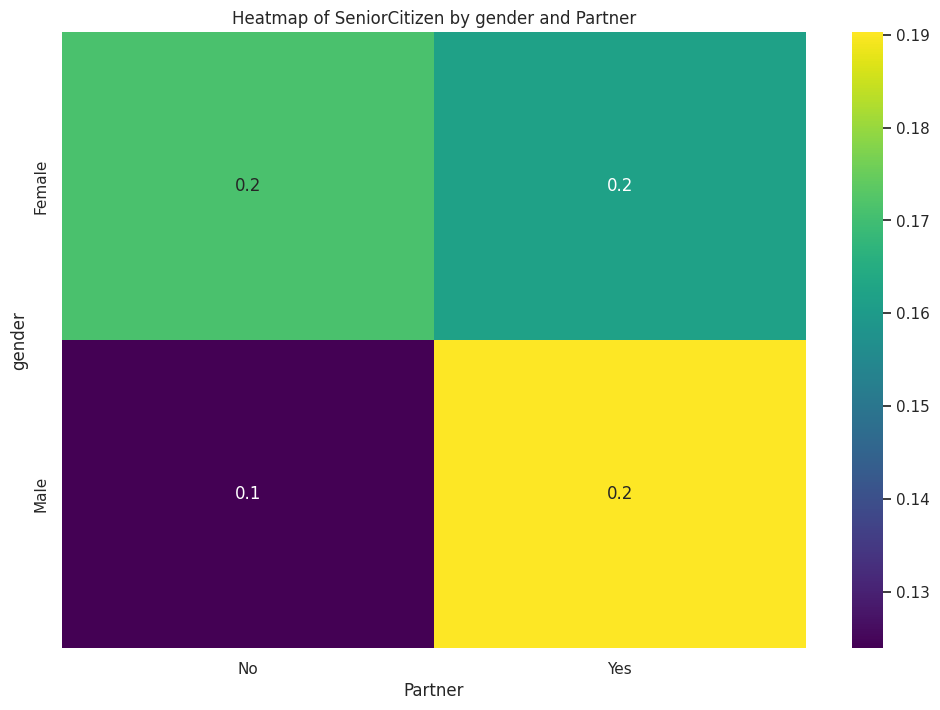

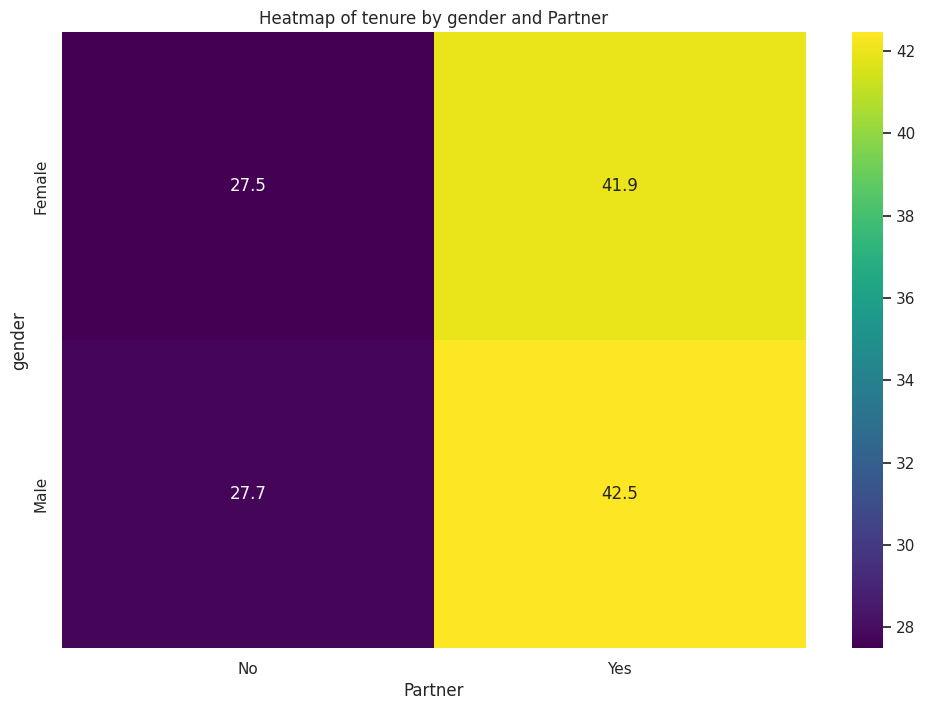

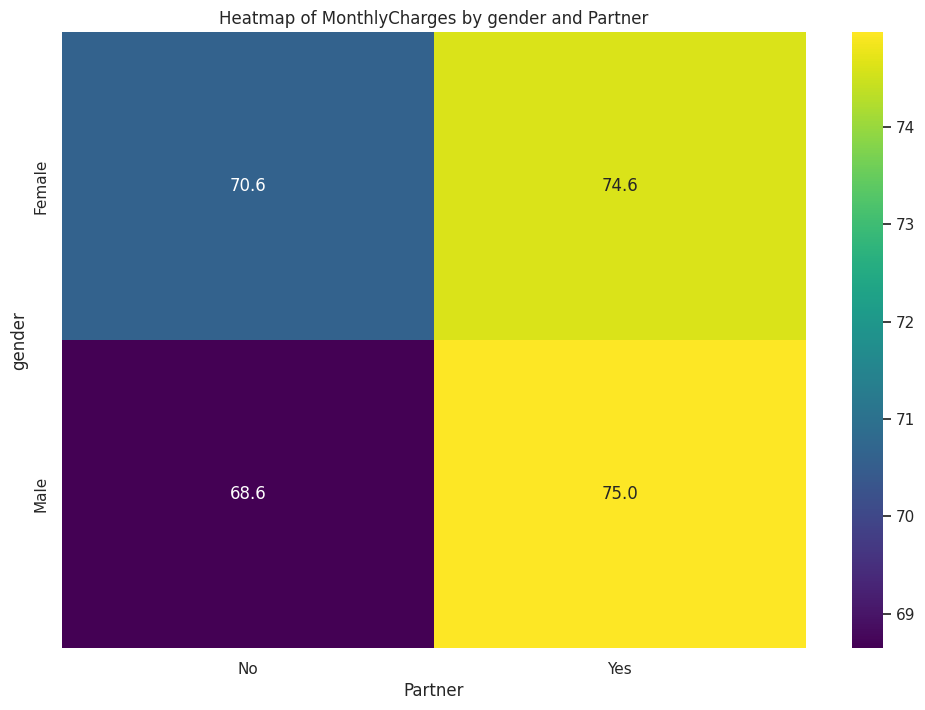

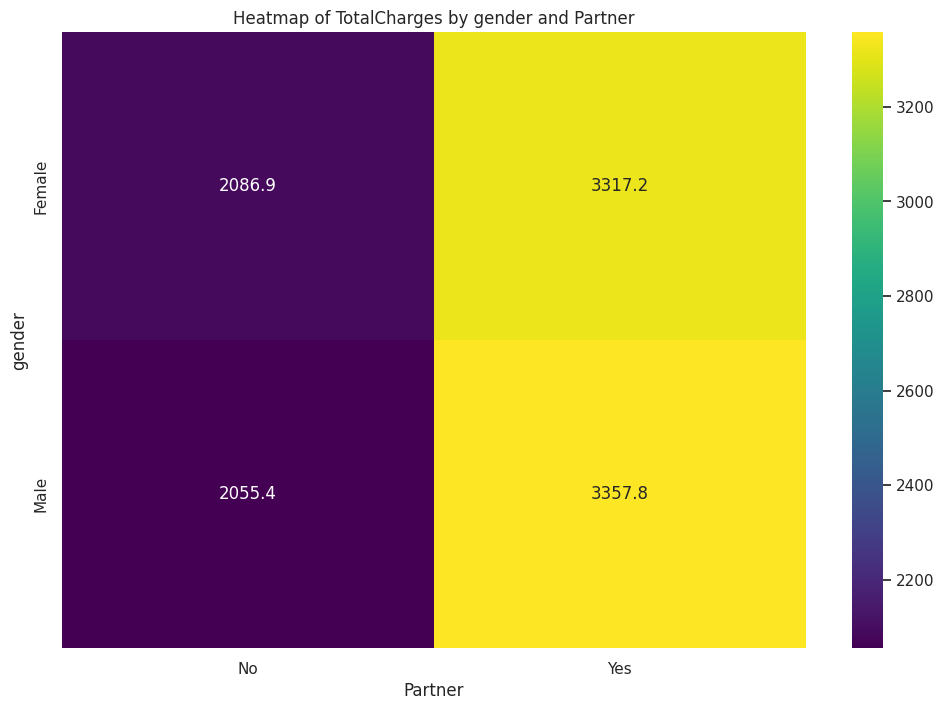

In [18]:
# List of categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Aggregate numerical data by categorical columns
agg_data = df.groupby(list(categorical_columns)).mean().reset_index()

for num_col in numerical_columns:
    pivot_table = agg_data.pivot_table(
        index=categorical_columns[0],
        columns=categorical_columns[1],
        values=num_col
    )

    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="viridis")
    plt.title(f'Heatmap of {num_col} by {categorical_columns[0]} and {categorical_columns[1]}')
    plt.xlabel(categorical_columns[1])
    plt.ylabel(categorical_columns[0])
    plt.show()

# **Prepare Data For Building Model**

In [19]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [20]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']
MonthlyChargesBin: ['(18.15, 38.35]' '(38.35, 58.45]' '(58.45, 78.55]' '(98.65, 118.75]'
 '(78.55, 98.65]']


In [21]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [22]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = LabelEncoder().fit_transform(df[col])

In [23]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargesBin
0,0,0,1,0,0.013889,0,0,0,0,1,...,0,0,0,0,1,2,0.115423,0.001275,0,0
1,1,0,0,0,0.472222,1,0,0,1,0,...,0,0,0,1,0,3,0.385075,0.215867,0,1
2,1,0,0,0,0.027778,1,0,0,1,1,...,0,0,0,0,1,3,0.354229,0.010310,1,1
3,1,0,0,0,0.625000,0,0,0,1,0,...,1,0,0,1,0,0,0.239303,0.210241,0,1
4,0,0,0,0,0.027778,1,0,1,0,0,...,0,0,0,0,1,2,0.521891,0.015330,1,2


# **Handling Imbalanced Data**

In [25]:
# Class count
count_class_0, count_class_1 = df.Churn.value_counts()

# Divide by class
df_class_0 = df[df['Churn'] == 0]
df_class_1 = df[df['Churn'] == 1]

In [26]:
df_class_0.shape , df_class_1.shape

((5174, 21), (1869, 21))

In [27]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

y.value_counts()

,count
Churn,
0,5174
1,1869


In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

,count
Churn,
0,5174
1,5174


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=5 , stratify= y_sm)

y_train.value_counts()

,count
Churn,
1,4139
0,4139


# **Logistic Regression**

In [30]:
model1 = LogisticRegression()
model1.fit(X_train ,y_train)

LogisticRegression()

Text(91.25, 0.5, 'Actual')

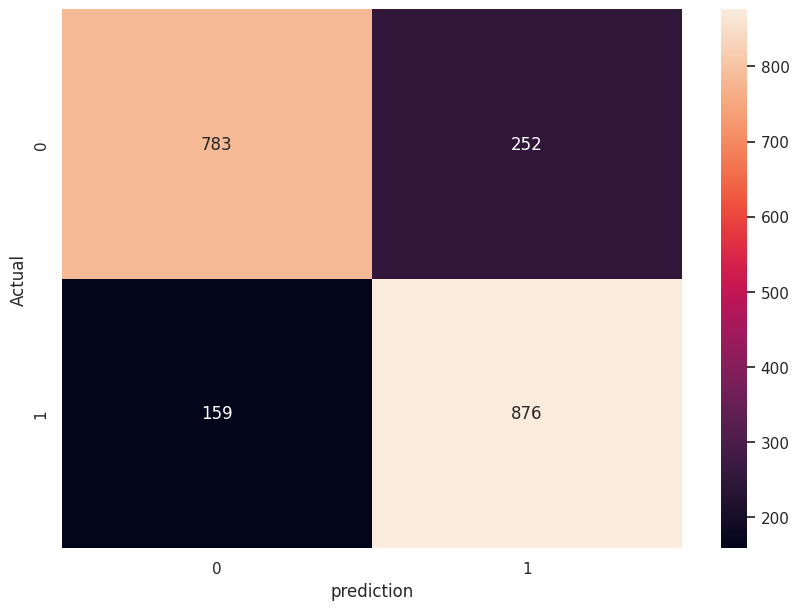

In [31]:
y_pred = model1.predict(X_test)

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True , fmt='d')
plt.xlabel('prediction')
plt.ylabel('Actual')

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1035
           1       0.78      0.85      0.81      1035

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



In [33]:
# Create a list of models to evaluate
models = {
    'Random Forest' : RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Ada Boost': AdaBoostClassifier(random_state=42),
    'XG Boost': XGBClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}


model_scores = []
for name , model in models.items():
    model.fit(X_train , y_train)


    y_pred = model.predict(X_test)
    metric = accuracy_score(y_test , y_pred)
    model_scores.append((name , metric))
    # print(name , 'mse :' , mean_squared_error(y_test , y_pred))



sm = sorted(model_scores , key=lambda x :x[1] ,reverse = False)
for model in sm:
    print('accuracy score of' , f'{model[0]} is {model[1]}')

accuracy score of Decision Tree is 0.7483091787439613
accuracy score of Naive Bayes is 0.7821256038647343
accuracy score of Support Vector Machine is 0.7956521739130434
accuracy score of Ada Boost is 0.7971014492753623
accuracy score of K-Nearest Neighbors is 0.8009661835748793
accuracy score of Logistic Regression is 0.8014492753623188
accuracy score of Gradient Boosting is 0.8115942028985508
accuracy score of XG Boost is 0.8241545893719807
accuracy score of Random Forest is 0.8280193236714976


# **Random Forest Classifer**

In [34]:
model2 = RandomForestClassifier()
model2.fit(X_train ,y_train)

RandomForestClassifier()

Text(91.25, 0.5, 'Actual')

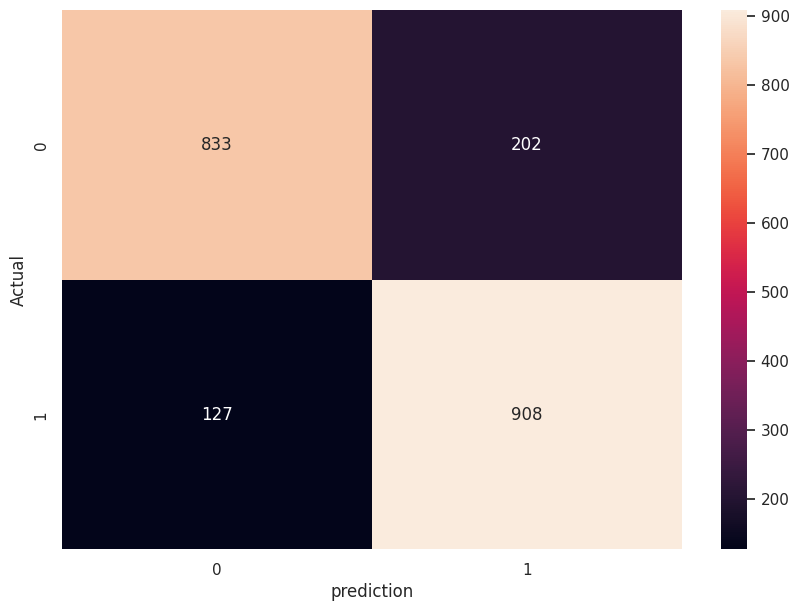

In [35]:
y_pred = model2.predict(X_test)

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True , fmt='d')
plt.xlabel('prediction')
plt.ylabel('Actual')

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1035
           1       0.82      0.88      0.85      1035

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



# **Artificial Neural Network (ANN)**

In [37]:
len(X_train.columns)

20

In [38]:
model = Sequential()
model.add(Dense(20, input_shape=(20,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu' ,  kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # You can change this to 'val_accuracy' if you prefer
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)


#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),  # Binary cross-entropy loss,
              metrics=['accuracy'])
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,  # Use a portion of the training data for validation
    callbacks=[early_stopping]
)

Epoch 1/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5223 - loss: 0.8053 - val_accuracy: 0.7210 - val_loss: 0.6375
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6658 - loss: 0.6313 - val_accuracy: 0.7500 - val_loss: 0.5313
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7295 - loss: 0.5503 - val_accuracy: 0.7651 - val_loss: 0.5095
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7506 - loss: 0.5209 - val_accuracy: 0.7699 - val_loss: 0.5033
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7545 - loss: 0.5227 - val_accuracy: 0.7705 - val_loss: 0.4984
Epoch 6/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7596 - loss: 0.5091 - val_accuracy: 0.7711 - val_loss: 0.4930
Epoch 7/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7609 - loss: 0.5034 - val_accuracy: 0.7723 - val_loss: 0.4918
Epoch 8/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7625 - loss: 0.5039 - val_ac

In [39]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7972 - loss: 0.4331
Test Loss: 0.4409685730934143
Test Accuracy: 0.7956521511077881


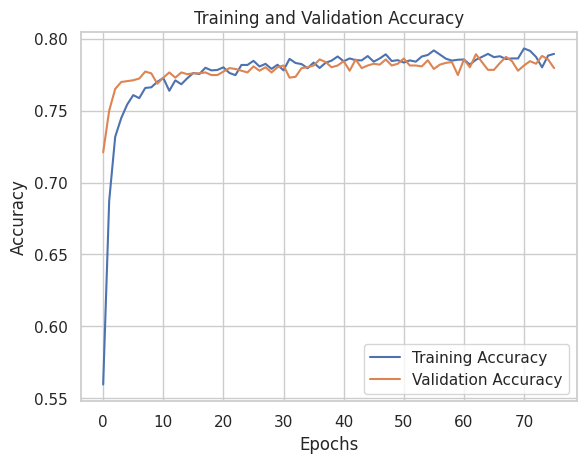

In [40]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# **Prediction**

In [41]:
yp = model.predict(X_test)
yp[:5]

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[0.6986465 ],
       [0.61211425],
       [0.29211286],
       [0.17124979],
       [0.02957449]], dtype=float32)

In [42]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [43]:
y_pred[:10]

[1, 1, 0, 0, 0, 1, 1, 1, 0, 1]

In [44]:
y_test[:10]

,Churn
4651,1
7512,1
1418,0
8651,1
4220,0
9883,1
5439,1
4835,0
5775,0
10175,1


**Observation:** The model successfully predicts whether a customer will churn based on their service and account features. By converting predicted probabilities into binary values, the model correctly identifies most churn and non-churn cases in the test sample. The predictions show that the model can distinguish between customers who are likely to stay and those at higher risk of leaving, making it useful for churn-prevention strategies.

# **The model predicts that most customers in the test sample will stay, but a noticeable portion is at risk of churning.**